## Урок 6

### Задание 1

Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев.
Сделать выводы о зависимости ошибки от этих параметров. Подобрать оптимальные значения этих гиперпараметров.

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt

In [114]:
from sklearn.datasets import load_diabetes

In [115]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [116]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

In [117]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании 
    # прибавляются с шагом eta
    return np.array([sum([
        eta * coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) 
                     for x in X])

In [118]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction) ** 2)) / len(y_real)

In [119]:
def bias(y, z):
    return - 2 * (z - y)

In [120]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # eta - скорость обучения
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            z_train = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, z_train))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

<b>На уроке наименьшая ошибка была найдена по следующим параметрам:

In [165]:
n_trees_25 = 25
coefs = [1] * n_trees
max_depth = 3
eta = 0.05

trees_25, train_errors_25, test_errors_25 = gb_fit(n_trees_25, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [166]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Деревьев: {n_trees}. Глубина: {max_depth}. Шаг: {eta}.\
    Ошибка трейн: {round(mean_squared_error(y_train, train_prediction))}.\
    Ошибка тест: {round(mean_squared_error(y_test, test_prediction))}.')    

In [167]:
evaluate_alg(X_train, X_test, y_train, y_test, trees_25, coefs, eta)

Деревьев: 100. Глубина: 3. Шаг: 0.05.    Ошибка трейн: 2104.    Ошибка тест: 2993.


In [208]:
def get_error_plot(n_trees, train_err, test_err, ymax):
    plt.figure(figsize=(8, 6))
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.ylim(0, ymax)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

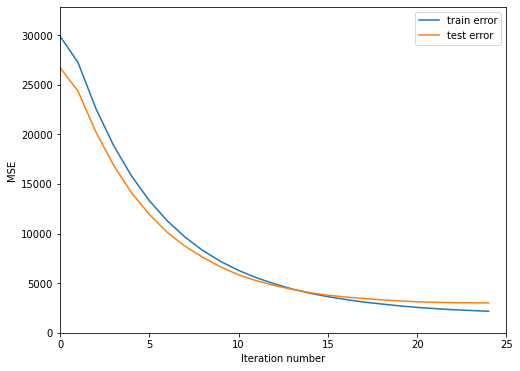

In [209]:
get_error_plot(n_trees_25, train_errors_25, test_errors_25, max(train_errors_25)*1.1)

Попробуем определить количество деревьев, при котором ошибка будет наименьшей.

In [184]:
n_trees_100 = 100
coefs = [1] * n_trees
max_depth = 3
eta = 0.05

trees_100, train_errors_100, test_errors_100 = gb_fit(n_trees_100, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
print(f'{test_errors_100=}')
print(f'{min(test_errors_100)=}, индекс: {test_errors_100.index(min(test_errors_100))}')


#2963.0879574675564
#33

test_errors_100=[26711.73873873874, 24346.945749023584, 20262.53048266786, 16860.19758092093, 14111.316878990516, 11924.862068017928, 10118.731849654505, 8717.327033605925, 7597.207104206079, 6630.349556335033, 5836.188084895494, 5247.421521799444, 4763.501499232097, 4379.765273482544, 4043.7368574405255, 3782.2157768619218, 3601.1373564483565, 3459.6468518414013, 3322.4072454445386, 3219.4217394958323, 3122.147120782329, 3073.7997721308466, 3035.4405368315647, 3022.176032741318, 3005.3035126596046, 2993.4572220304362, 2989.5025903638325, 2975.3463235810245, 2971.1595575027145, 2968.8894877530975, 2976.9388489724047, 2981.7886129455237, 2980.0138878199004, 2963.0879574675564, 2967.5068252472147, 2989.860776289201, 3002.0617570458344, 3011.11834091481, 3014.082380719929, 3005.340578144629, 2997.1583454222005, 2982.274066537032, 3000.109209547173, 3018.7030247616567, 3046.8017141159016, 3057.82333083493, 3060.0697947163226, 3058.301837479964, 3056.8612221631565, 3042.2054718841105, 3047.

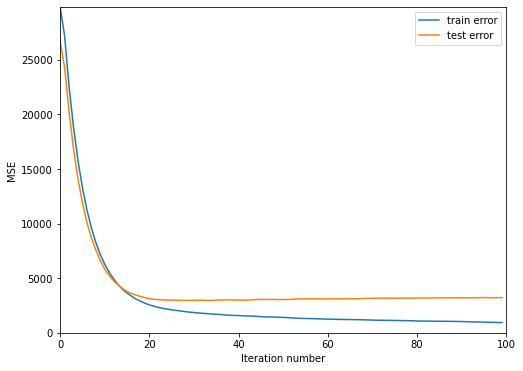

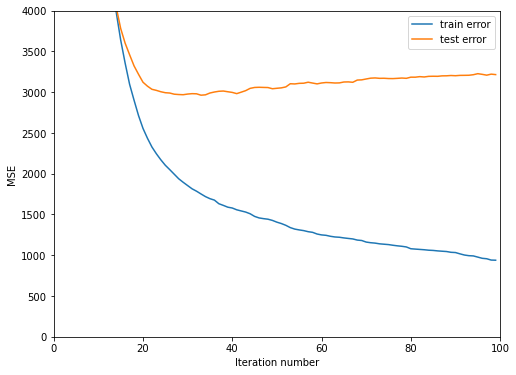

In [228]:
get_error_plot(n_trees_100, train_errors_100, test_errors_100, max(train_errors_100))
get_error_plot(n_trees_100, train_errors_100, test_errors_100, 4000)

Увеличенную диаграмму интересно посмотреть, так как на ней видно, что у кривых несколько локальных минимумов.

<b> Вывод:</b> Оптимальное количество n_trees = 34. Минимум = 2963.0879574675564

Теперь подберем оптимальную глубину дерева:

In [218]:
n_trees_d1 = 100
coefs = [1] * n_trees
max_depth_d1 = 1
eta = 0.05

trees_d1, train_errors_d1, test_errors_d1 = gb_fit(n_trees_d1, max_depth_d1, X_train, X_test, y_train, y_test, coefs, eta)  

print(test_errors_d1)
print(min(test_errors_d1))
print(test_errors_d1.index(min(test_errors_d1)))

[26711.73873873874, 24401.253611528267, 20292.415556571756, 16970.71987312888, 14331.172623011937, 12151.285762502697, 10363.832648426229, 8934.811025284494, 7839.36068112654, 7000.27072698702, 6211.031982729819, 5637.311047918854, 5128.947794609292, 4781.84775533035, 4414.231286873111, 4176.619294523169, 3972.8137406276082, 3832.5459393370515, 3664.191300132364, 3543.0162111669274, 3466.992136102172, 3356.987833944672, 3314.0027791772536, 3264.8599360552585, 3199.734085852069, 3180.35468742704, 3164.976073417435, 3144.6520421875316, 3101.1500058087945, 3062.845855227914, 3032.631298464945, 3008.3941670781046, 2999.5086344478864, 2998.896014992839, 2972.587287837855, 2956.90814307924, 2939.970836723613, 2916.9040114048053, 2907.0068352695203, 2893.356563821193, 2892.2493047134362, 2894.964599768799, 2891.67507674606, 2882.6974770631973, 2865.1477341753243, 2855.3898621115, 2860.3832566643346, 2859.257575239987, 2859.0666383884873, 2853.331496031549, 2836.720364594743, 2840.263591555418

<b>Вывод:</b> При глубине дерева 1, оптимальное количество деревьев 89, минимум равен 2783.772759627407

In [219]:
n_trees_d2 = 100
coefs = [1] * n_trees
max_depth_d2 = 2
eta = 0.05

trees_d2, train_errors_d2, test_errors_d2 = gb_fit(n_trees_d2, max_depth_d2, X_train, X_test, y_train, y_test, coefs, eta)  

print(test_errors_d2)
print(min(test_errors_d2))
print(test_errors_d2.index(min(test_errors_d2)))

[26711.73873873874, 24370.4612452326, 20248.585302263076, 16824.2417548436, 14123.03759994083, 11944.438015326228, 10129.493832277714, 8663.3373246962, 7524.4553601938405, 6612.98956492995, 5955.227684901946, 5301.875455207022, 4824.479788809631, 4499.699225608368, 4153.452820716345, 3880.7317466505015, 3673.0403981334357, 3557.055634814291, 3402.9512338372547, 3278.67984719561, 3196.3954256049246, 3149.394887603158, 3104.305231419607, 3062.8830368474037, 3005.578842524469, 2992.1300068747155, 2981.6310260580135, 2967.6784041584447, 2944.5483998860777, 2929.997586051719, 2928.105124688287, 2900.5858440682823, 2904.434900515893, 2895.2920115967772, 2906.263798592195, 2914.5257648494953, 2910.8672137123217, 2906.4124767598723, 2915.6206539103796, 2899.47590659085, 2906.9774093634264, 2911.769578590584, 2897.725506857514, 2887.615135713898, 2896.1952272038493, 2888.6814441056977, 2899.4267820898845, 2896.2316783209794, 2894.8875395355485, 2877.8218320140118, 2887.3703554686103, 2886.89241

<b>Вывод:</b> При глубине дерева 2, оптимальное количество деревьев 50, минимум равен 2877.8218320140118

In [220]:
n_trees_d4 = 50
coefs = [1] * n_trees
max_depth_d4 = 4
eta = 0.05

trees_d4, train_errors_d4, test_errors_d4 = gb_fit(n_trees_d4, max_depth_d4, X_train, X_test, y_train, y_test, coefs, eta)  

print(test_errors_d4)
print(min(test_errors_d4))
print(test_errors_d4.index(min(test_errors_d4)))

[26711.73873873874, 24357.67926731597, 20284.435935642992, 16939.860863564743, 14233.405510355222, 12124.26767238541, 10302.176311584448, 8914.710753816575, 7747.430678390078, 6845.238931655876, 6077.395595258388, 5506.920982632908, 4942.141436724462, 4548.242183930948, 4258.129352310611, 4010.021268701601, 3778.796350531743, 3628.012629299963, 3533.132034160121, 3433.5966843166007, 3361.273249928364, 3298.136701610176, 3255.9683365399587, 3210.853703842159, 3179.4964234005947, 3146.968946215392, 3113.2175028755637, 3132.4612299166215, 3134.832980689005, 3138.870053673051, 3117.1040409575808, 3110.0757311309167, 3078.887201049908, 3068.894365764255, 3062.6442077662637, 3067.8056656328586, 3069.860580540901, 3050.0757123815874, 3049.144047603781, 3032.3478469428283, 3039.3804911476855, 3065.8958719222346, 3071.808064044453, 3073.1538224145906, 3056.0749256482777, 3050.4873027978924, 3052.2391958670605, 3070.2753506360737, 3078.878973067415, 3080.973290492186]
3032.3478469428283
39


<b>Вывод:</b> При глубине дерева 4, оптимальное количество деревьев 40, минимум равен 3032.3478469428283

In [221]:
n_trees_d5 = 40
coefs = [1] * n_trees
max_depth_d5 = 5
eta = 0.05

trees_d5, train_errors_d5, test_errors_d5 = gb_fit(n_trees_d5, max_depth_d5, X_train, X_test, y_train, y_test, coefs, eta)  

print(test_errors_d5)
print(min(test_errors_d5))
print(test_errors_d5.index(min(test_errors_d5)))

[26711.73873873874, 24308.996106514078, 20395.71253180888, 17025.675295470945, 14252.727407066246, 12093.29281538389, 10374.582321158407, 8861.869587108693, 7727.095479125964, 6877.348227146519, 6120.704793954695, 5553.623162618222, 5084.046987300423, 4736.469017043626, 4434.2524984276915, 4203.7238900153125, 4053.2178984437173, 3903.5961222586293, 3779.6108773493247, 3671.6786693680983, 3673.909781878181, 3627.613486457798, 3627.792669251349, 3652.3905826877167, 3624.3269077523146, 3613.884984325194, 3616.230272231371, 3639.1995804250796, 3606.0094059174157, 3640.8452814967677, 3648.918002980096, 3644.38781206391, 3663.515988555597, 3664.184717959323, 3668.693277113887, 3676.402520993523, 3669.1793617716894, 3670.7765435140673, 3669.8014871053606, 3655.505644906792]
3606.0094059174157
28


<b>Вывод:</b> При глубине дерева 5, оптимальное количество деревьев 29, минимум равен 3606.0094059174157

In [234]:
X1 = np.array([89, 50, 34, 40, 29])
X2 = np.array([1, 2, 3, 4, 5])
y = np.array([2783, 2877, 2963, 3032, 3606])

In [231]:
X1 = [89, 50, 40, 34, 29]
X2 = [1, 2, 3, 4, 5]
y = [2783, 2877, 2963, 3032, 3606]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

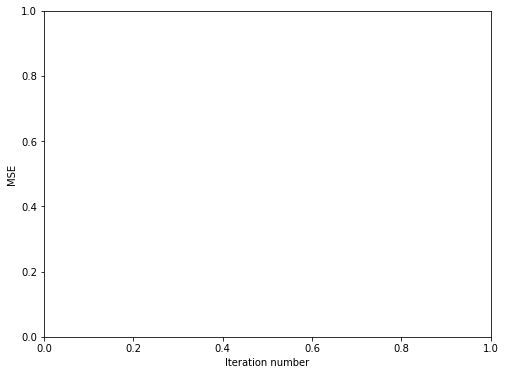

In [235]:
get_error_plot(X1, X2, y, max(X2)) # Доделаю.

### Задание 2

Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

### Задание 3

Модифицировать алгоритм градиентного бустинга, взяв за основу реализацию решающего дерева из ДЗ_4 (для задачи регрессии). Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.